<h1>  Urine-Large Data set  </h>

Multifil_Lda model for 4 beer samples verses 5 urine samples.
T-test, log2 Fold Change. Significance on adjusted p-values(function from stack overflow) 
Also PCA plot for Files(samples) and for topics.  
All out put to a CSV file.'b4_u5_alltopics.csv'  



In [44]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
# Not sure why python not looking in here but runs from anoconder command line in this enviroment
import sys
sys.path.append ('C:\Users\Fran\Anaconda2\envs\ipykernel_py2\Lib\site-packages')

import pylab as plt
import numpy as np
import pandas as pd
import seaborn as sns
from IPython.display import display, HTML

import os
import platform

#if platform.system().lower() == 'linux':
#    basedir = '/home/joewandy/git/multifile_lda'
#else:
basedir ='C:\Users\Fran\Documents\MScProject\workspace\MultiFile\multifile_lda'
sys.path.append(basedir)

from lda_topicmodel import TopicModel
from topic_da import *
from lda_annotate import Word,Topic,Annotation

sns.set_style("whitegrid", {'axes.grid' : False})

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


<h2>1. Load existing LDA results for beer versus urine data</h2>

Load a pre-run model

In [41]:
#C:\Users\Fran\Dropbox\beer_analysis\large_study\Urine_mzXML_large_study\all_urine.dict
dict_file = '/Users/Fran/Dropbox/beer_analysis/large_study/Urine_mzXML_large_study/all_urine.dict'

a = TopicModel(dict_file, model_type='nb')

#### copy instance varaibles


In [42]:
K = a.K
F = a.F
sampleIDs = a.sampleIDs
alphas = a.alphas
topic_dict = a.topic_dict
print F,K, alphas.shape, len(sampleIDs)
print sampleIDs


22 300 (22L, 300L) 22
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21]


In [47]:
datadir=''
input_set = [
    (datadir + 'Urine_StrokeDrugs_02_T10_POS_ms1.csv', datadir + 'Urine_StrokeDrugs_02_T10_POS_ms2.csv'),
    (datadir + 'Urine_StrokeDrugs_03_T10_POS_ms1.csv', datadir + 'Urine_StrokeDrugs_03_T10_POS_ms2.csv'),
    (datadir + 'Urine_StrokeDrugs_08_T10_POS_ms1.csv', datadir + 'Urine_StrokeDrugs_08_T10_POS_ms2.csv'),
    (datadir + 'Urine_StrokeDrugs_09_T10_POS_ms1.csv', datadir + 'Urine_StrokeDrugs_09_T10_POS_ms2.csv'),
    (datadir + 'Urine_StrokeDrugs_17_T10_POS_ms1.csv', datadir + 'Urine_StrokeDrugs_17_T10_POS_ms2.csv'),
    (datadir + 'Urine_StrokeDrugs_18_T10_POS_ms1.csv', datadir + 'Urine_StrokeDrugs_18_T10_POS_ms2.csv'),
    (datadir + 'Urine_StrokeDrugs_28_T10_POS_ms1.csv', datadir + 'Urine_StrokeDrugs_28_T10_POS_ms2.csv'),
    (datadir + 'Urine_StrokeDrugs_32_T10_POS_ms1.csv', datadir + 'Urine_StrokeDrugs_32_T10_POS_ms2.csv'),
    (datadir + 'Urine_StrokeDrugs_38_T10_POS_ms1.csv', datadir + 'Urine_StrokeDrugs_38_T10_POS_ms2.csv'),
    (datadir + 'Urine_StrokeDrugs_49_T10_POS_ms1.csv', datadir + 'Urine_StrokeDrugs_49_T10_POS_ms2.csv'),
    (datadir + 'Urine_StrokeDrugs_51_T10_POS_ms1.csv', datadir + 'Urine_StrokeDrugs_51_T10_POS_ms2.csv'),
    (datadir + 'Urine_StrokeDrugs_52_T10_POS_ms1.csv', datadir + 'Urine_StrokeDrugs_52_T10_POS_ms2.csv'),
    (datadir + 'Urine_StrokeDrugs_53_T10_POS_ms1.csv', datadir + 'Urine_StrokeDrugs_53_T10_POS_ms2.csv'),
    (datadir + 'Urine_StrokeDrugs_54_T10_POS_ms1.csv', datadir + 'Urine_StrokeDrugs_54_T10_POS_ms2.csv'),
    (datadir + 'Urine_StrokeDrugs_57_T10_POS_ms1.csv', datadir + 'Urine_StrokeDrugs_57_T10_POS_ms2.csv'),
    (datadir + 'Urine_StrokeDrugs_58_T10_POS_ms1.csv', datadir + 'Urine_StrokeDrugs_58_T10_POS_ms2.csv'),
    (datadir + 'Urine_StrokeDrugs_72_T10_POS_ms1.csv', datadir + 'Urine_StrokeDrugs_72_T10_POS_ms2.csv'),
    (datadir + 'Urine_StrokeDrugs_80_T10_POS_ms1.csv', datadir + 'Urine_StrokeDrugs_80_T10_POS_ms2.csv'),
    (datadir + 'Urine_StrokeDrugs_85_T10_POS_ms1.csv', datadir + 'Urine_StrokeDrugs_85_T10_POS_ms2.csv'),
    (datadir + 'Urine_StrokeDrugs_93_T10_POS_ms1.csv', datadir + 'Urine_StrokeDrugs_93_T10_POS_ms2.csv'),
    (datadir + 'Urine_StrokeDrugs_97_T10_POS_ms1.csv', datadir + 'Urine_StrokeDrugs_97_T10_POS_ms2.csv'),
    (datadir + 'Urine_StrokeDrugs_105_T10_POS_ms1.csv', datadir + 'Urine_StrokeDrugs_105_T10_POS_ms2.csv'),
]


samples = []
for f in input_set:
    tokens =f[0].split("/")
    for token in tokens:
        #if token.startswith('Urine'):
        if ('Urine' in token)== 1:
            t = token.split('_')
            samples.append (t[0]+ t[2])
a.set_sampleIDs(samples)   
print a.sampleIDs

['Urine02', 'Urine03', 'Urine08', 'Urine09', 'Urine17', 'Urine18', 'Urine28', 'Urine32', 'Urine38', 'Urine49', 'Urine51', 'Urine52', 'Urine53', 'Urine54', 'Urine57', 'Urine58', 'Urine72', 'Urine80', 'Urine85', 'Urine93', 'Urine97', 'Urine105']


#### Add a Null row for the pooled sample

In [59]:
df = pd.read_csv(('urine_metadata.csv'))

#add a row of null values for the pooled sample
row = [None]* 37
df.loc[len(df)] = row
ids = df['Urine Sample ID']
metadata = df.loc[(df["Urine Sample ID"]in a.sampleIDs)] 
#topic_up =stats.loc[( stats['log2FC'] < 0 )& (stats['MW p_adjust']< 0.01) ] 
display(metadata)

TypeError: invalid type comparison

## PCA on expected alpha

In [9]:
import sklearn.decomposition as deco

n_components = 2
#x = (x - np.mean(x, 0)) / np.std(x, 0) # You need to normalize your data first

alphas = np.array(analysis.model.mean_alpha) 
x = np.divide(alphas, alphas.sum(axis = 0)) # expected alphas

pca = deco.PCA(n_components) # n_components is the components number after reduction
x_r = pca.fit(x).transform(x)
print ('explained variance (first %d components): %.2f'%(n_components, sum(pca.explained_variance_ratio_)))##

explained variance (first 2 components): 0.39


C:\Users\Fran\Anaconda2\lib\site-packages\matplotlib\figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


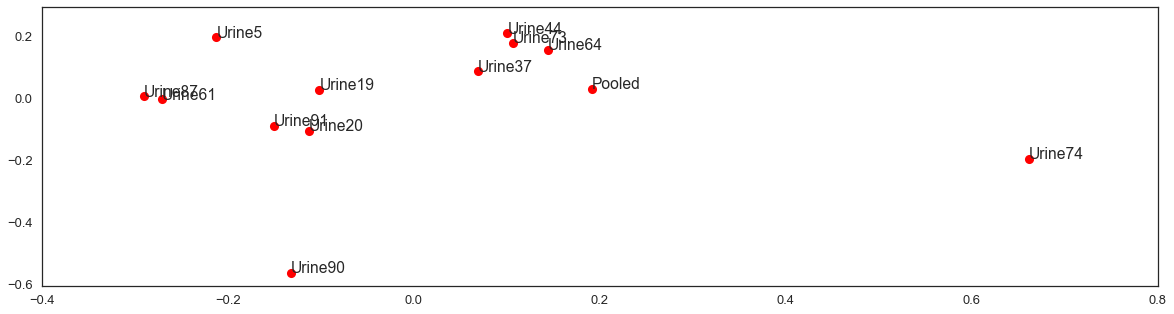

In [44]:
 group1 = range (analysis.F)
fig = plt.figure()
for i,x in enumerate(x_r[:,0]):
    y = x_r[i,1]
    plt.text(x,y,samples[i])
    if i in group1:
        plt.plot(x,y,'ro')
    else:
        plt.plot(x,y,'ro')
        
fig.show()
#fig.savefig('U13_PCA.pdf')

In [11]:
import sklearn.decomposition as deco

n_components = 2

x = np.divide(alphas, alphas.sum(axis = 0)).transpose() # expected alphas

pca = deco.PCA(n_components) # n_components is the components number after reduction
x_r = pca.fit(x).transform(x)
print ('explained variance (first %d components): %.2f'%(n_components, sum(pca.explained_variance_ratio_)))##

explained variance (first 2 components): 0.37


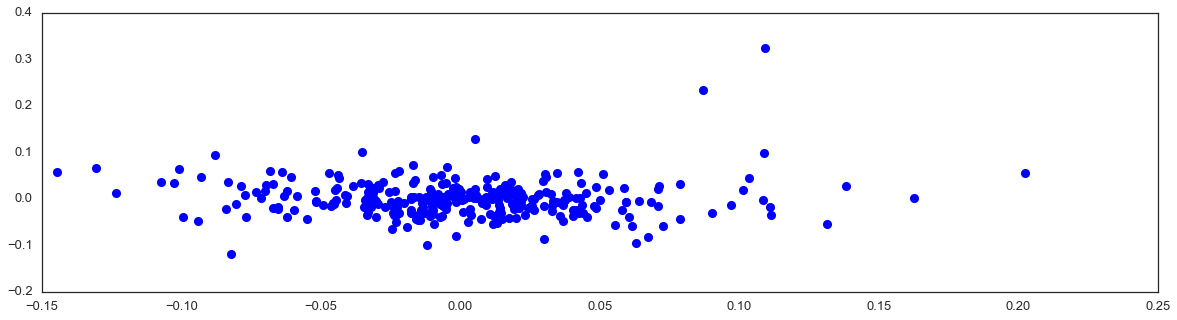

In [13]:

plt.figure()
for i,x in enumerate(x_r[:,0]):
    y = x_r[i,1]
    plt.plot(x,y,'bo')
fig.show()

### T -test.  On Sex

In [5]:
#print len(metadata)
#print list(metadata)
sex = metadata['Sex F=1']
sex = pd.Series (sex,dtype = "category")

females = np.array(sex == 1.0)
males = np.array(sex == 0.0)
print males

[False  True  True  True False  True False False  True  True  True False
 False]


In [ ]:
T-test on Drug( Statin (7:6),ACE 1(6:7),ARB(8:5),Diuretic(7:6))

In [34]:

drug = metadata['ARB']
print drug
drug = pd.Series (drug,dtype = "category")
print drug
d = np.array(drug == '1')
nd = np.array(drug == '0')
print d
print nd
groups = [d,nd]

Urine5       0
Urine19      0
Urine20      0
Urine37      1
Urine44      0
Urine61      1
Urine64      0
Urine73      1
Urine74      1
Urine87      1
Urine90      0
Urine91      1
Pooled     NaN
Name: ARB, dtype: object
Urine5       0
Urine19      0
Urine20      0
Urine37      1
Urine44      0
Urine61      1
Urine64      0
Urine73      1
Urine74      1
Urine87      1
Urine90      0
Urine91      1
Pooled     NaN
Name: ARB, dtype: category
Categories (2, object): [0, 1]
[False False False  True False  True False  True  True  True False  True
 False]
[ True  True  True False  True False  True False False False  True False
 False]


In [35]:
df = alpha_stats(alphas_exp,d, significant = 0.5)
display(df)

,topic,log2FC,t-stat,p-value,p_adjust,significant
0,0,-0.273857,-1.825861,0.095113,0.972986,False
1,1,-0.309254,-1.090191,0.298935,0.972986,False
2,2,0.407720,2.632696,0.023295,0.972986,False
3,3,0.183688,0.624975,0.544734,0.972986,False
4,4,-0.900063,-1.289713,0.223607,0.972986,False
5,5,-0.269114,-1.560788,0.146864,0.972986,False
6,6,0.112502,0.395846,0.699788,0.972986,False
7,7,0.028047,0.080469,0.937310,0.972986,False
8,8,0.129852,0.472968,0.645482,0.972986,False
9,9,-0.098221,-0.170724,0.867541,0.972986,False


In [36]:
interesting = df.loc[df['significant']]['topic']
print len(interesting)
#plot_barplots(alphas_exp, [0,299])

0


PCA of alpha on topic. Colours red and green are significant and red is "up regulated " in Urine and green "down-reg"

### Clustering

In [30]:
#x = np.divide(alphas, alphas.sum(axis = 0)).transpose()
x = np.divide(alphas, alphas.sum(axis = 0))
print x.shape


(13L, 300L)


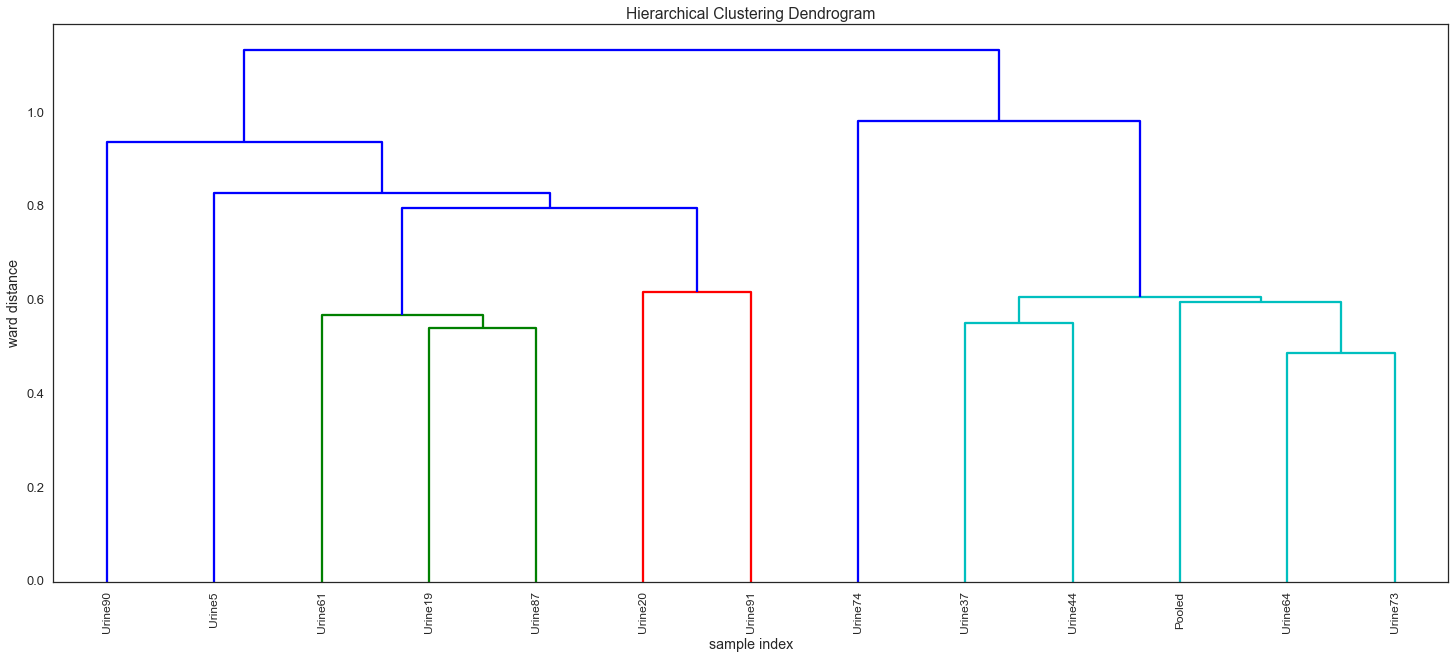

In [31]:
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
#fig = plt.figure()
# generate the linkage matrix
Z = linkage(x, 'ward')

# calculate full dendrogram
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('ward distance')
dendrogram(
    Z,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=12.,  # font size for the x axis labels
    labels = samples
)
plt.show()
plt.savefig('U13_h_clust.pdf')

### Heirarchical clustering of the topics.

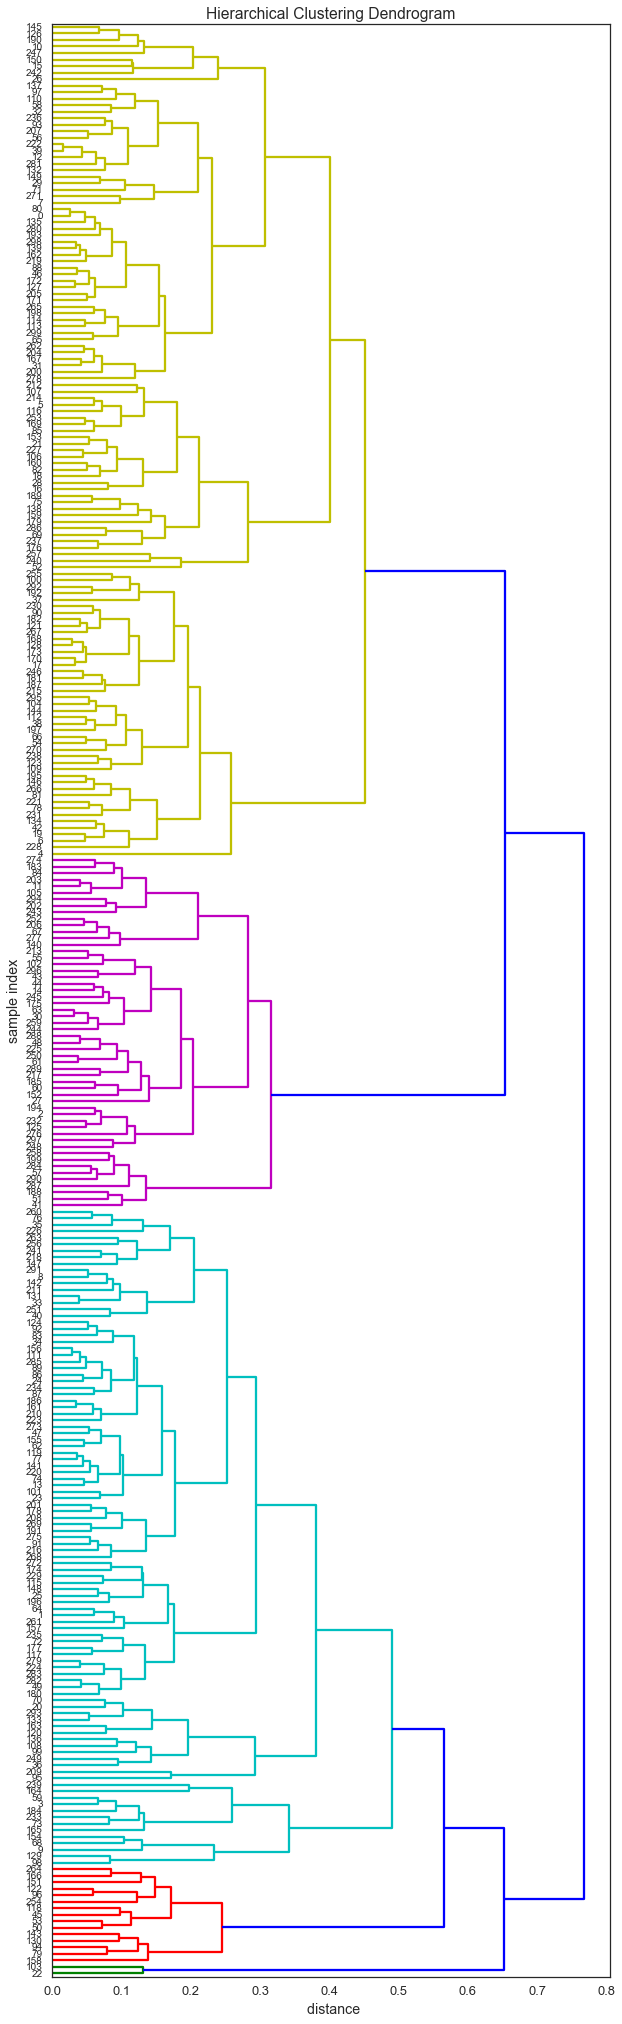

In [34]:
x = np.divide(alphas, alphas.sum(axis = 0)).transpose()
# generate the linkage matrix
Z = linkage(x, 'ward')

# calculate full dendrogram
plt.figure(figsize=(10, 35))
plt.title('Hierarchical Clustering Dendrogram')
plt.ylabel('sample index')
plt.xlabel(' distance')
dendrogram(
    Z,
    orientation = 'right',
    #leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=10.,  # font size for the x axis labels
)
plt.show()

#### Cut the tree at depth max_d
Clusters then contains the group of each topic.

In [33]:
from scipy.cluster.hierarchy import fcluster
max_d = 0.5
clusters = fcluster(Z, max_d, criterion='distance')


In [130]:
import sklearn.decomposition as deco

n_components = 2

x = np.divide(alphas, alphas.sum(axis = 0)).transpose() # expected alphas

pca = deco.PCA(n_components) # n_components is the components number after reduction
x_r = pca.fit(x).transform(x)
print ('explained variance (first %d components): %.2f'%(n_components, sum(pca.explained_variance_ratio_)))##

explained variance (first 2 components): 0.74


###  K-means clustering

Look for elbow to indicate number of clusters to choose.

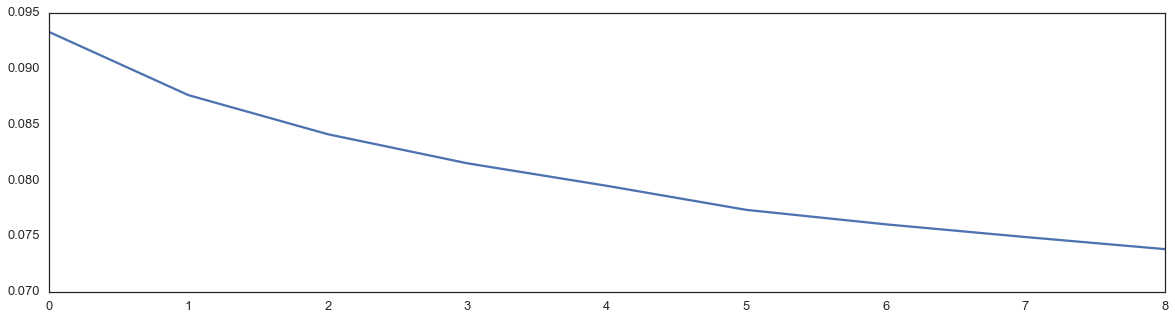

In [36]:
#plot variance for each value for 'k' between 1,10
import numpy as np
from scipy import cluster
from matplotlib import pyplot

initial = [cluster.vq.kmeans(x,i) for i in range(1,10)]
pyplot.plot([var for (cent,var) in initial])
pyplot.show()

In [37]:
from sklearn import cluster, datasets
X  = np.divide(alphas, alphas.sum(axis = 0)).transpose()


k_means = cluster.KMeans(n_clusters=5)
k_means.fit(X) 

k_clusters =(k_means.labels_[::])

### PCA plot of topics coloured on K-means clusters.

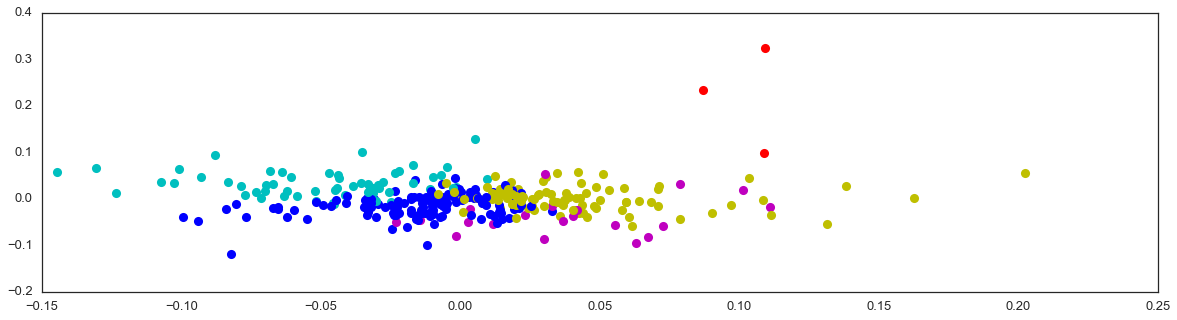

In [24]:
colors = ['bo', 'co', 'yo', 'mo', 'ro']
plt.figure()
for i,x in enumerate(x_r[:,0]):
    y = x_r[i,1]
    plt.plot(x,y, colors[k_clusters[i]]) 
fig.show()